In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

In [2]:
path = "/Users/zaid/Desktop/chatbots-3/chatlib/datasets/profiles.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


For the essay columns:
- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


/Users/zaid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


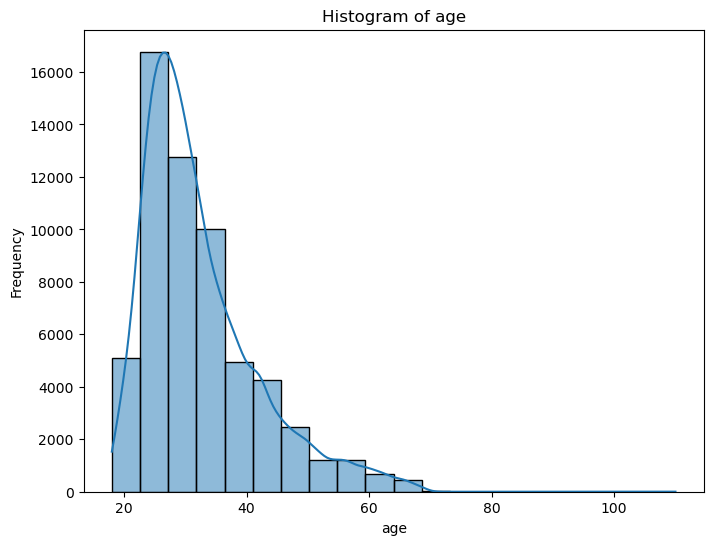

/Users/zaid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


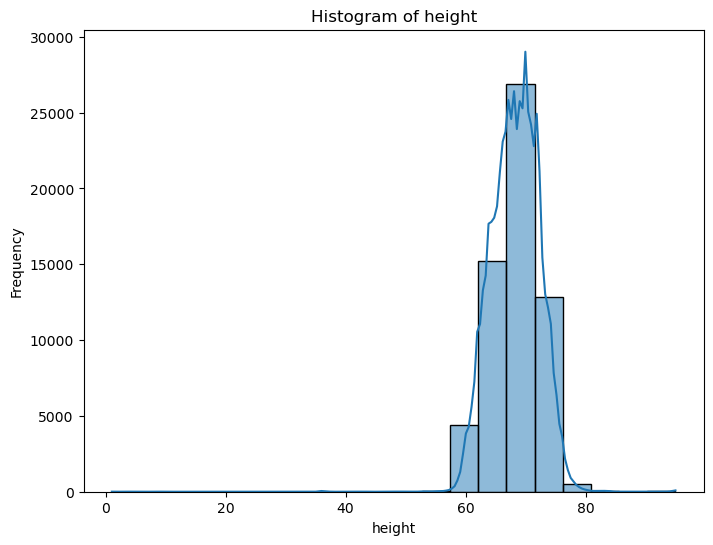

/Users/zaid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


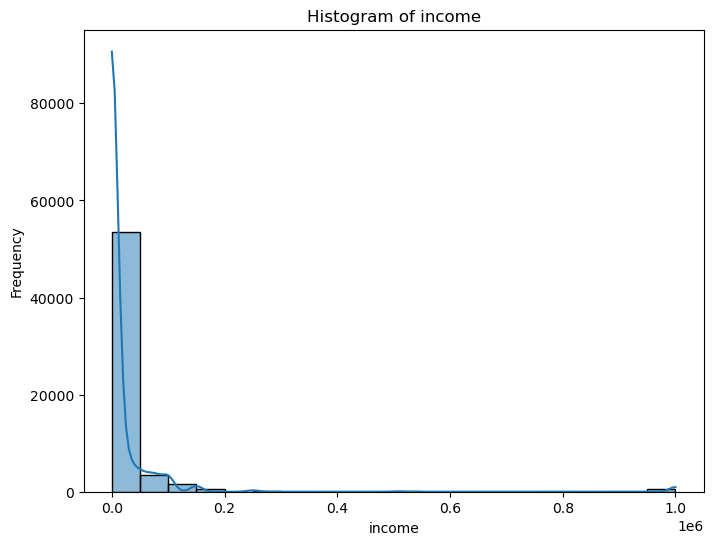

In [6]:
# Histogram for numerical data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

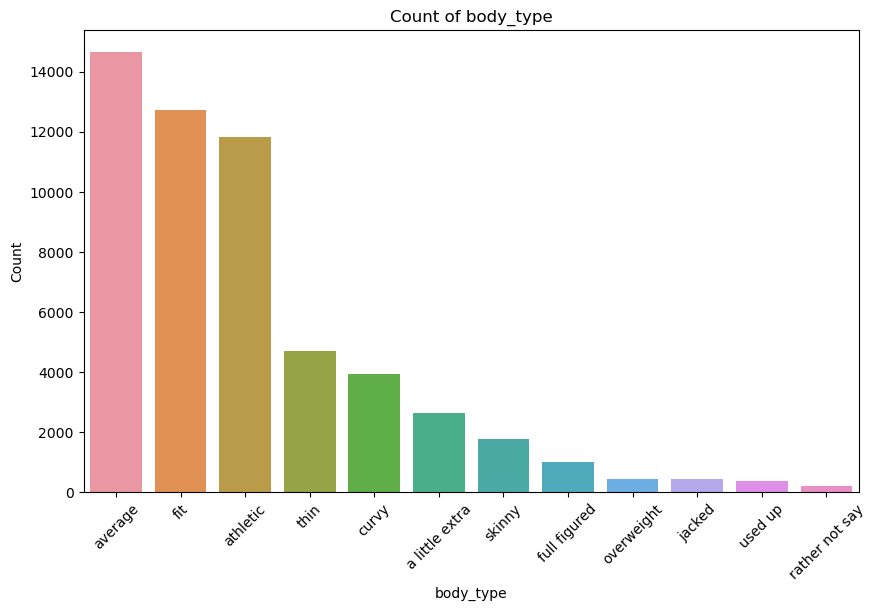

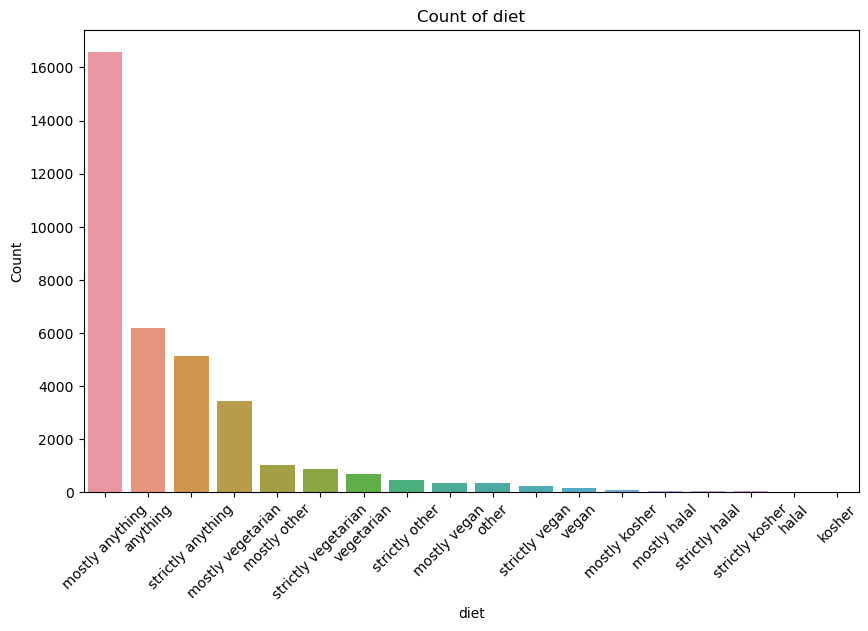

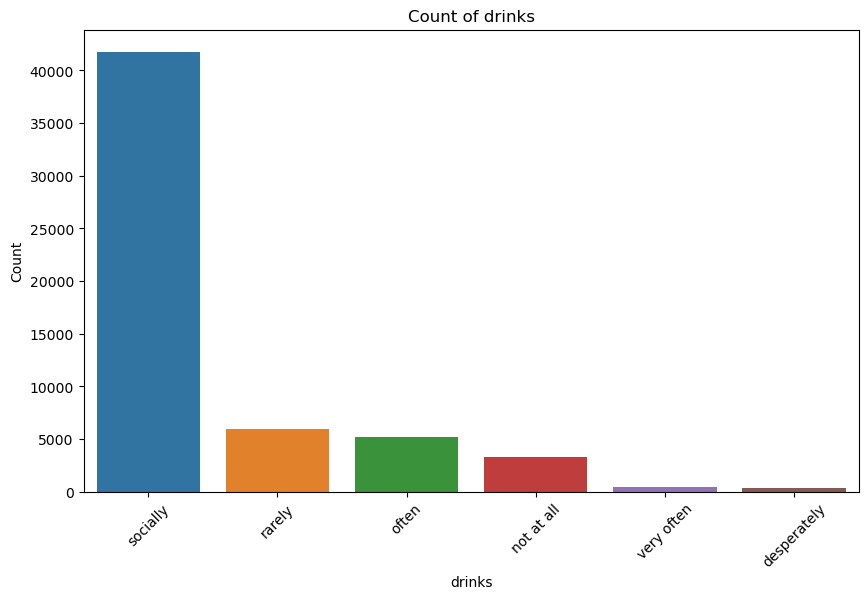

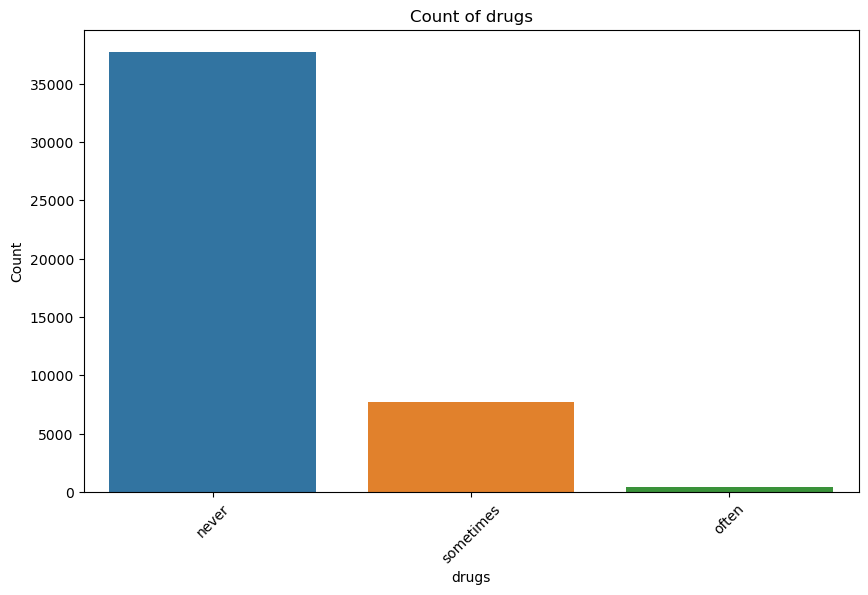

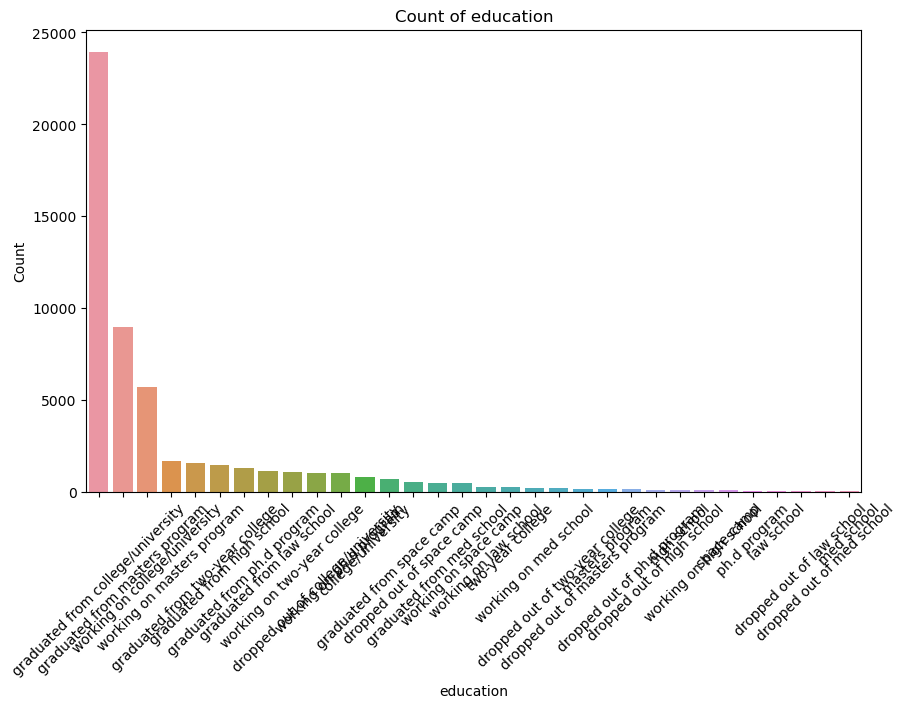

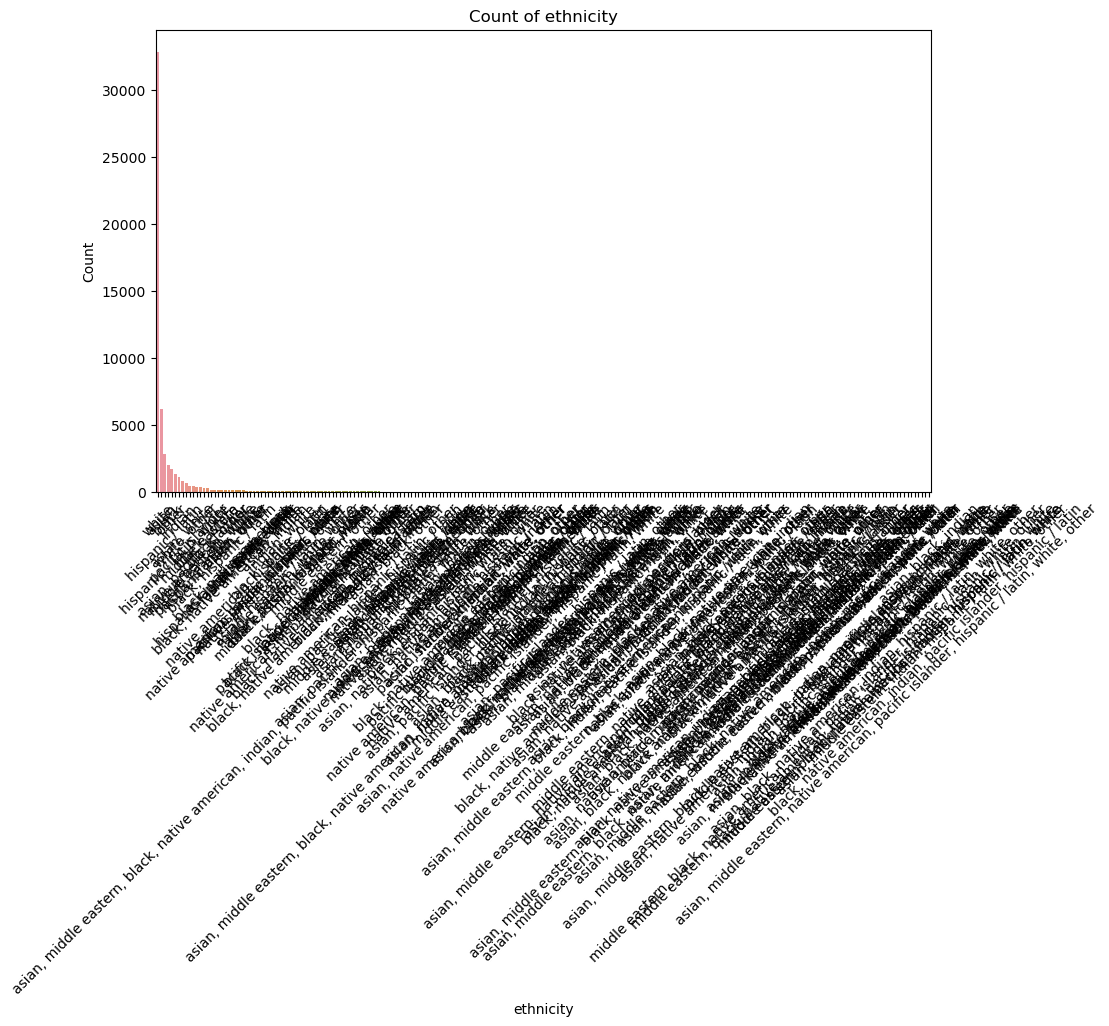

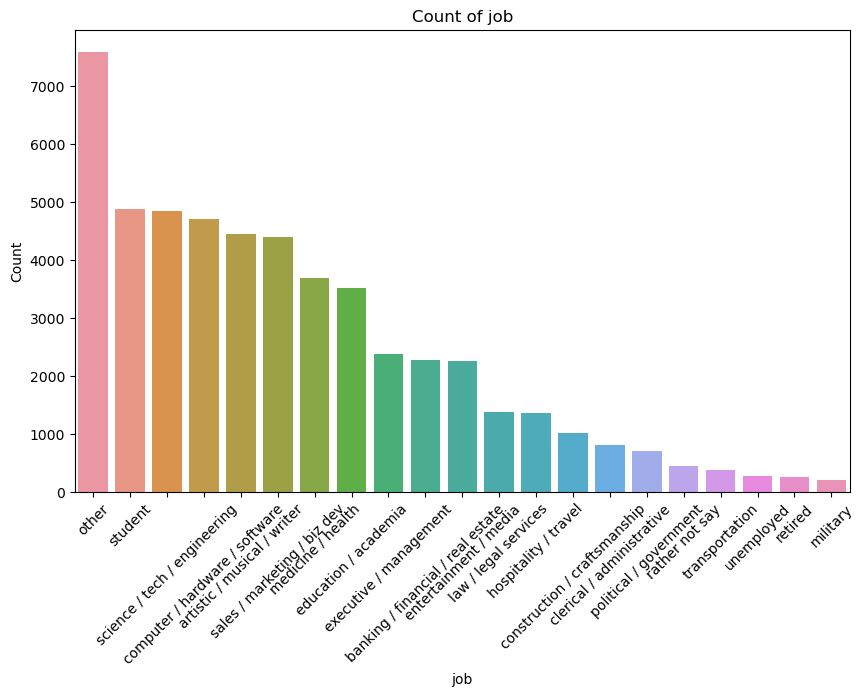

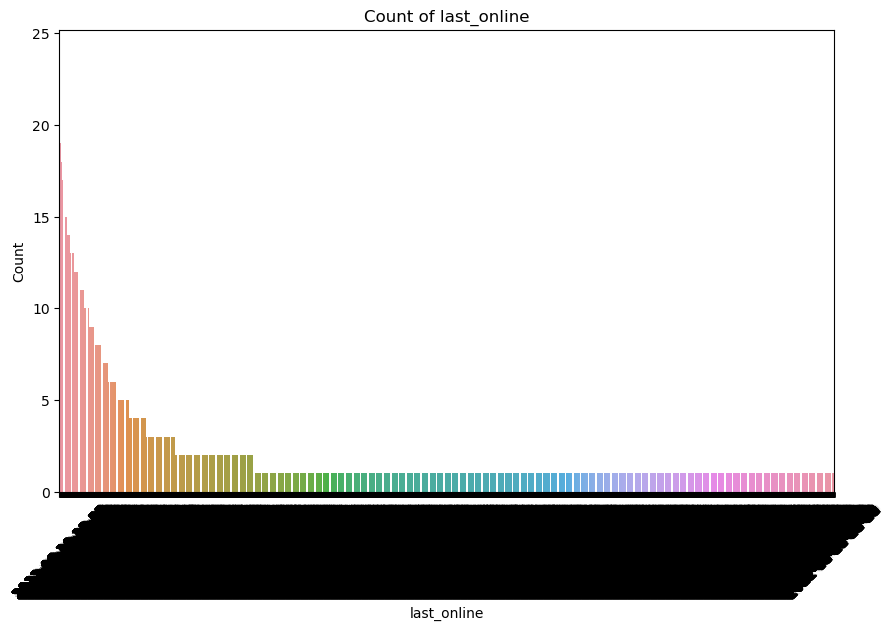

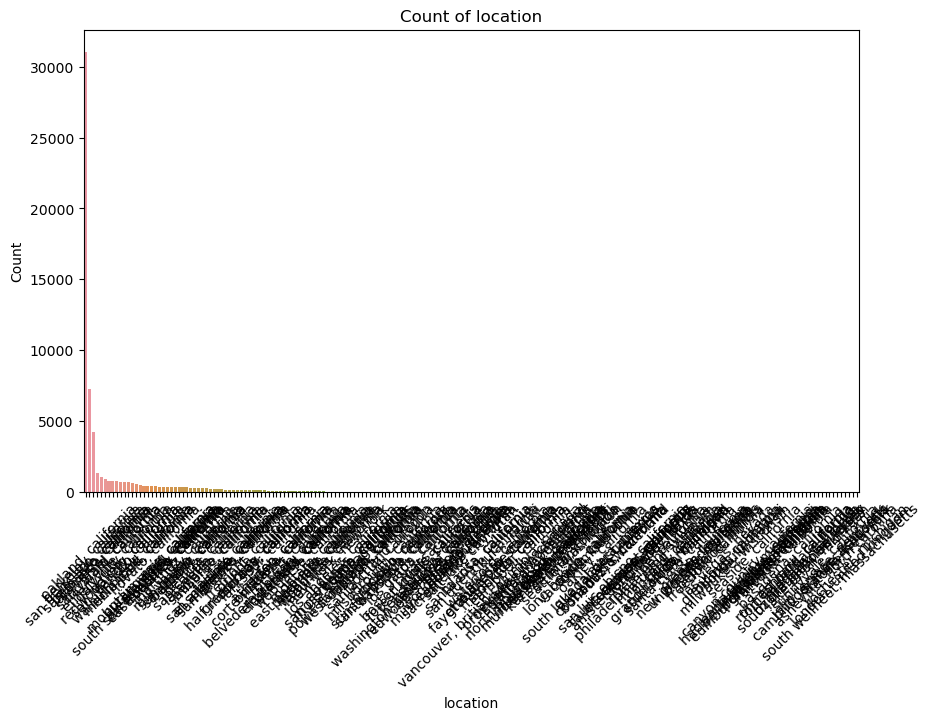

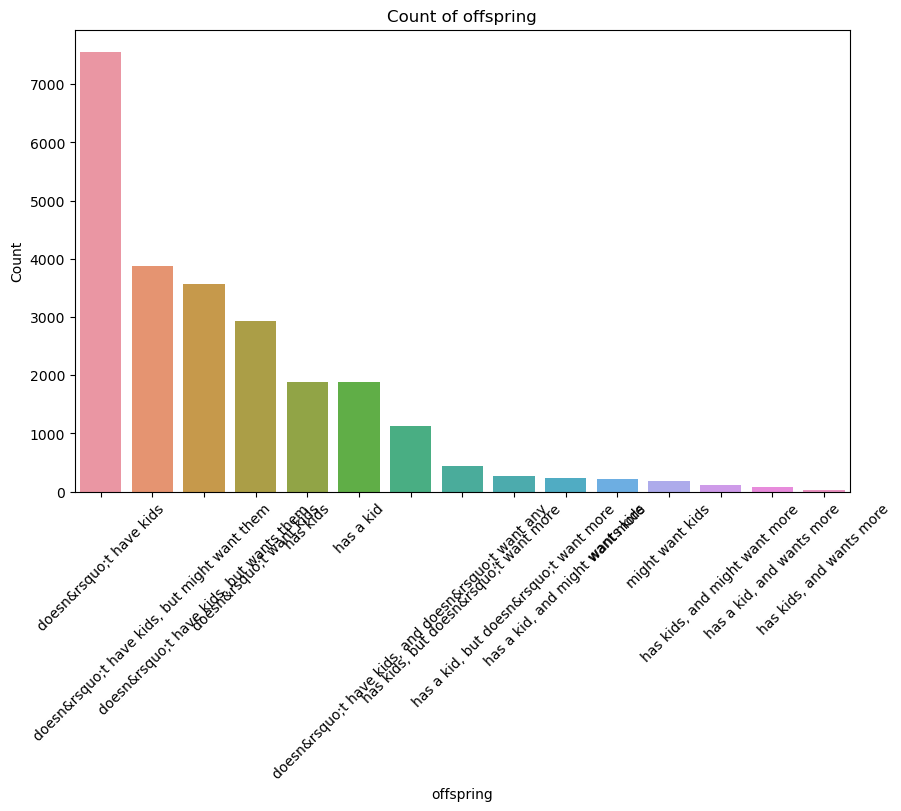

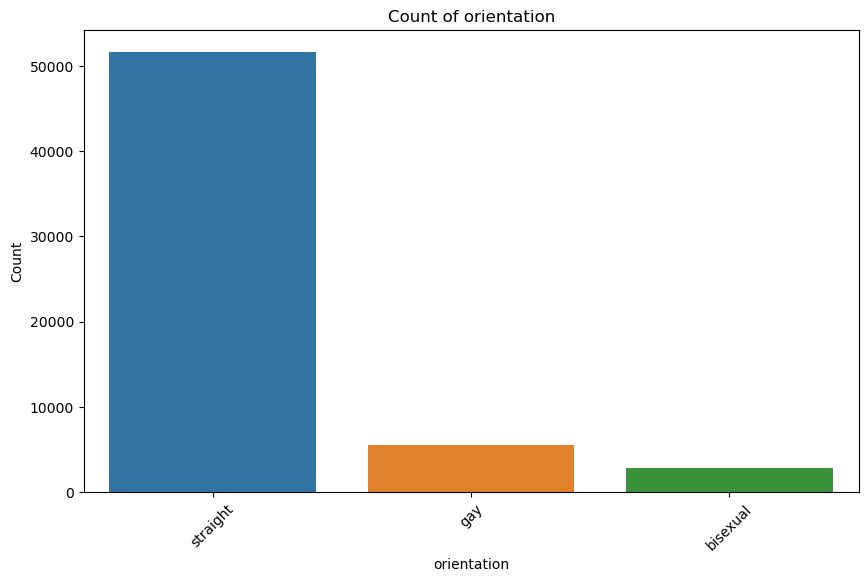

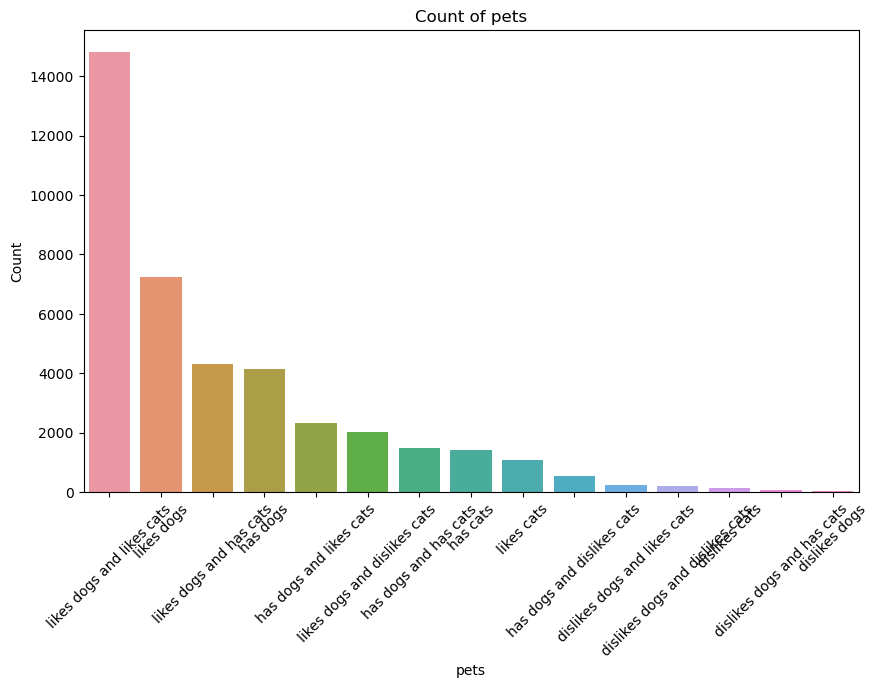

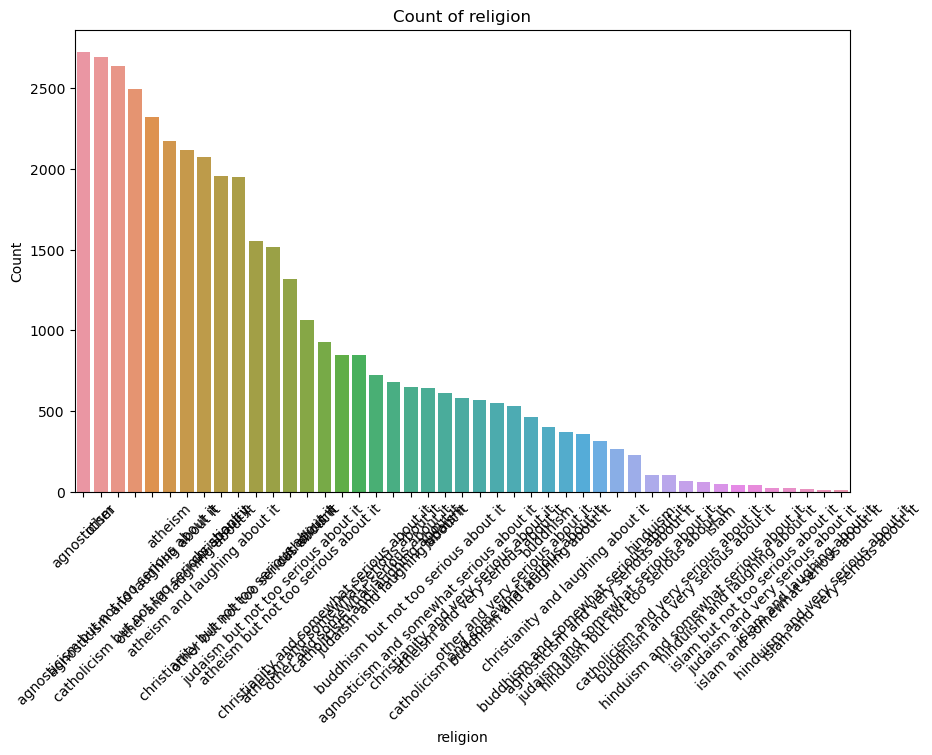

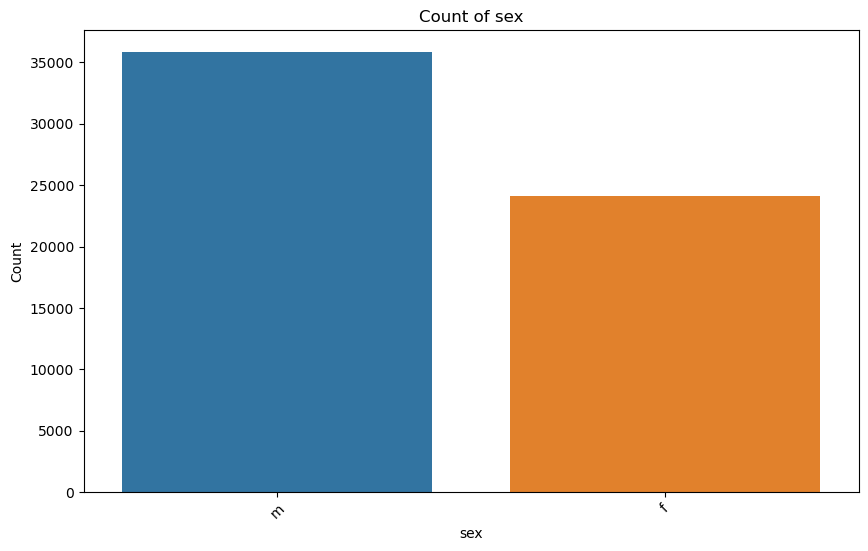

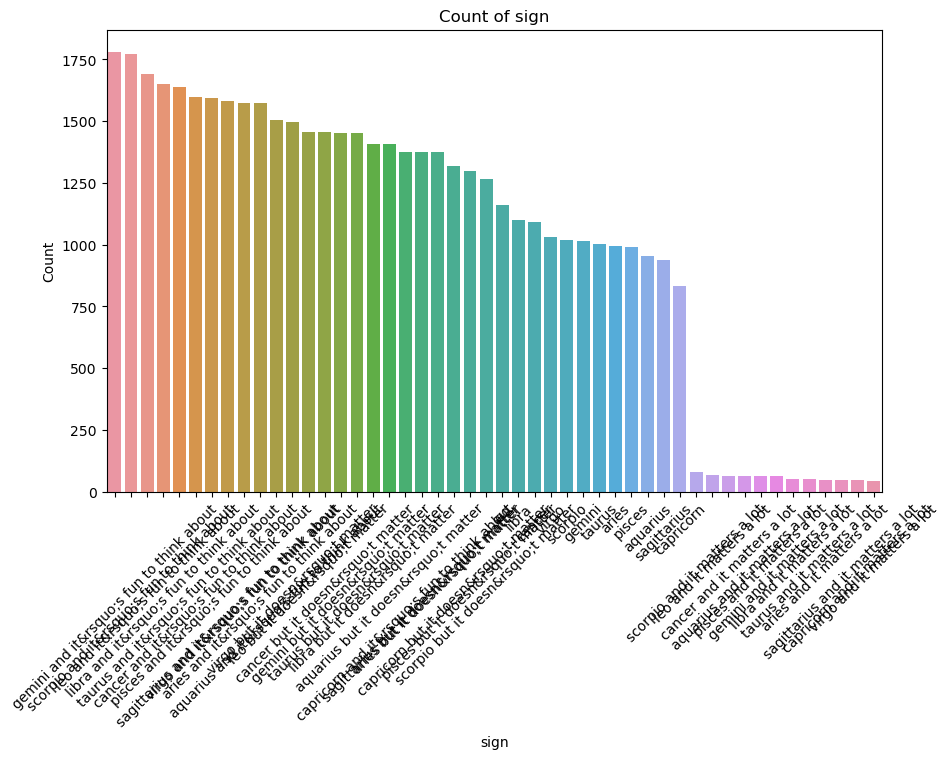

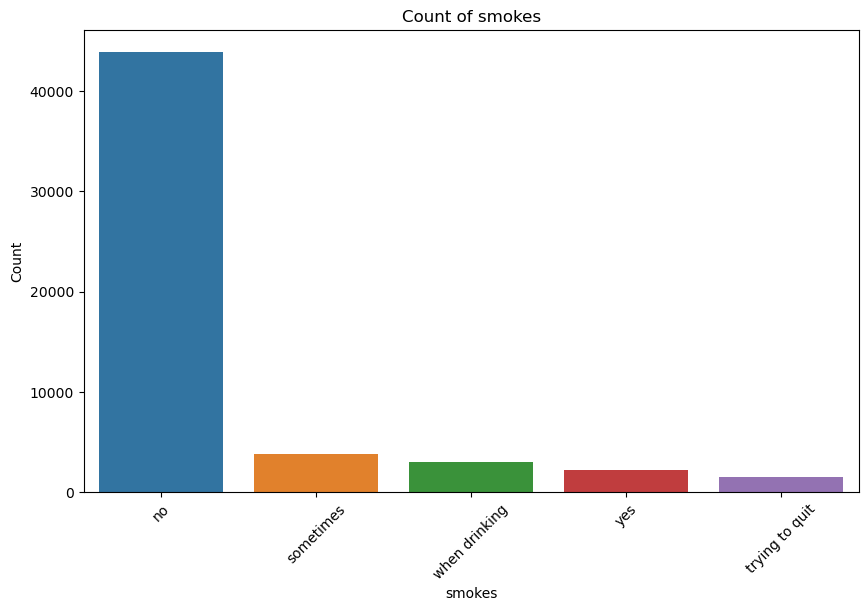

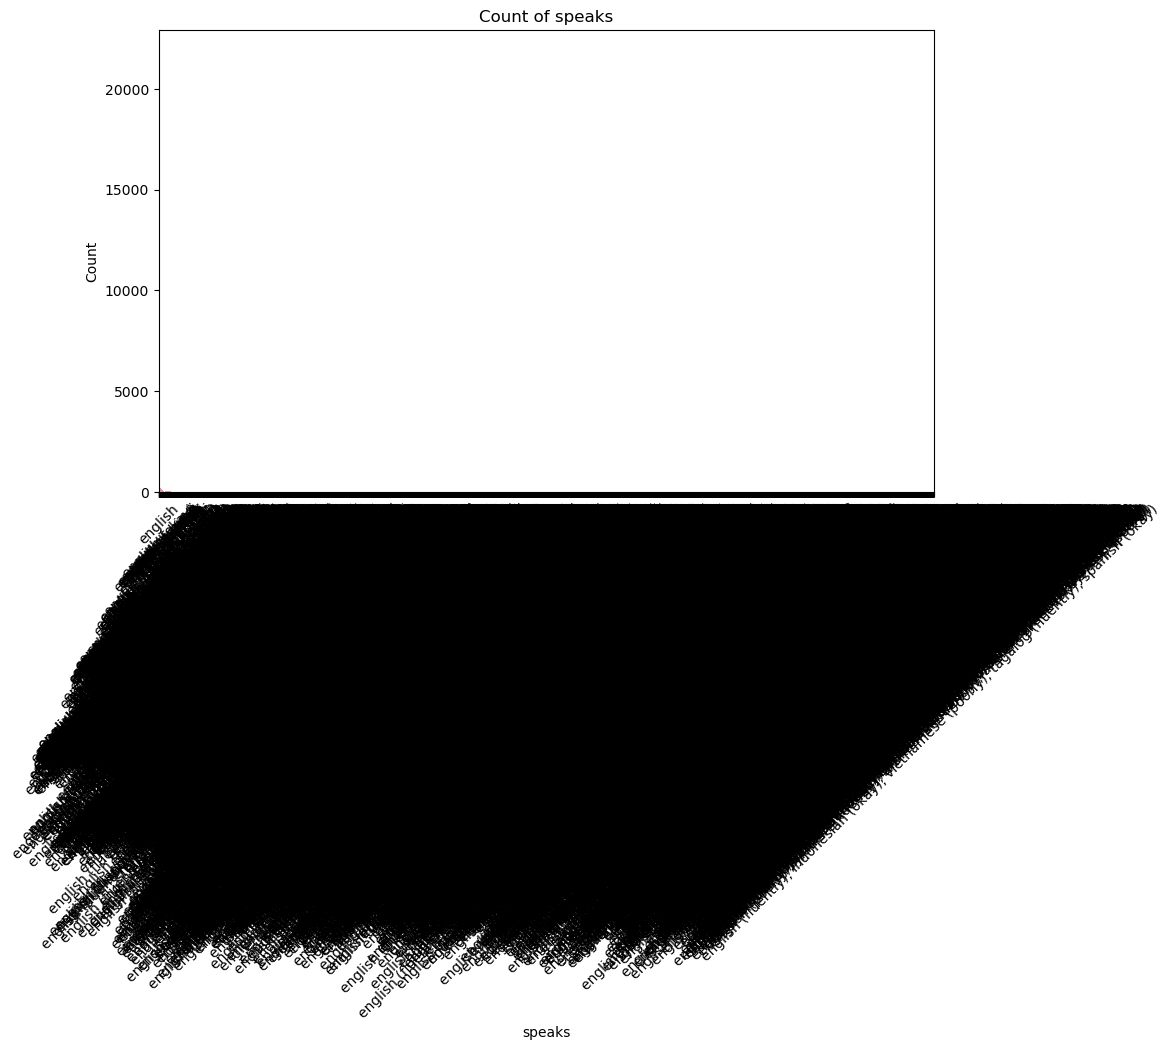

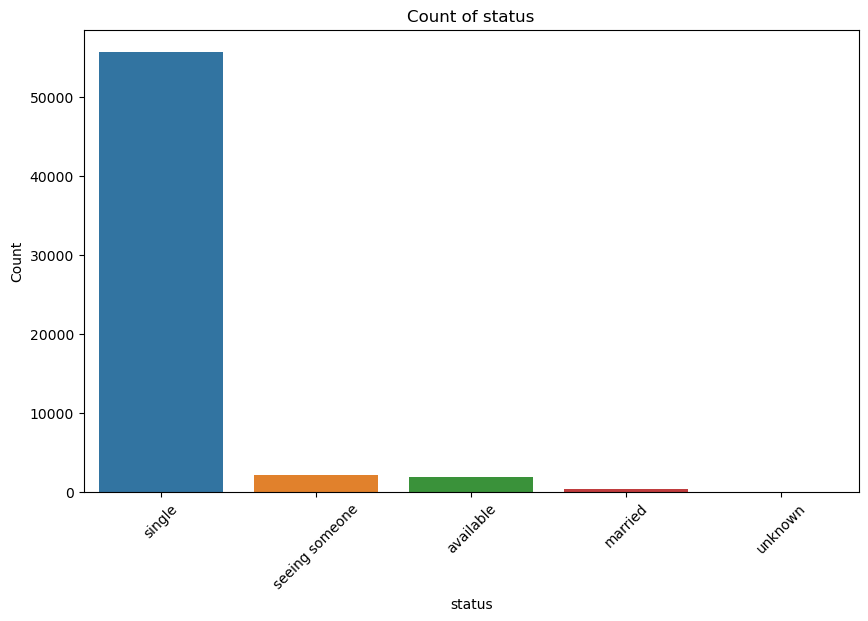

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if 'essay' not in col]  # Exclude 'essay' columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

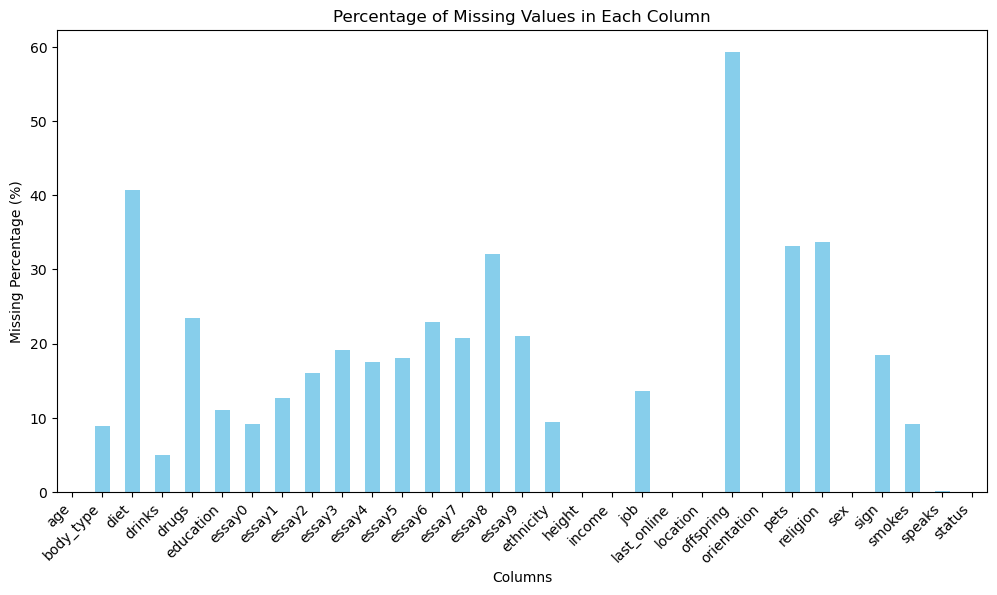

In [7]:
# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Plotting missing values percentage using a bar plot
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


For now we will drop all nulls. However, if the model is not performing up to expectations we will drop nas whose percentage is below 25 and impute the other missing values with either the mean if it is an int or with the mode if it is an object

In [7]:
df = df.dropna()

We will join the essay columns to have just one:

In [8]:
# Concatenate essay texts into a single column and drop original essay columns
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df['all_essays'] = df[essay_columns].fillna('').apply(lambda x: ' '.join(x.map(str)), axis=1)
df.drop(columns=essay_columns, inplace=True)

In [9]:
df.info() #checkcing that there are no null values left

<class 'pandas.core.frame.DataFrame'>
Index: 4407 entries, 0 to 59944
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4407 non-null   int64  
 1   body_type    4407 non-null   object 
 2   diet         4407 non-null   object 
 3   drinks       4407 non-null   object 
 4   drugs        4407 non-null   object 
 5   education    4407 non-null   object 
 6   ethnicity    4407 non-null   object 
 7   height       4407 non-null   float64
 8   income       4407 non-null   int64  
 9   job          4407 non-null   object 
 10  last_online  4407 non-null   object 
 11  location     4407 non-null   object 
 12  offspring    4407 non-null   object 
 13  orientation  4407 non-null   object 
 14  pets         4407 non-null   object 
 15  religion     4407 non-null   object 
 16  sex          4407 non-null   object 
 17  sign         4407 non-null   object 
 18  smokes       4407 non-null   object 
 19  speaks    

In [13]:
# Handle categorical data with Label Encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != 'all_essays':  # Exclude 'all_essays' from label encoding
        df[col] = label_encoder.fit_transform(df[col])


In [14]:
df.head(15)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,all_essays
0,22,0,9,4,0,20,34,75.0,-1,19,...,2,2,14,3,1,16,1,0,3,about me:<br />\n<br />\ni would love to think...
19,33,1,2,4,0,11,103,72.0,-1,17,...,0,2,14,19,1,30,0,1,3,i relocated to san francisco half a year ago. ...
22,30,4,2,4,0,8,103,69.0,-1,7,...,2,2,14,2,1,35,0,1130,3,i tend to think the same way a comedian does a...
94,29,4,2,4,2,8,103,67.0,40000,0,...,4,2,14,3,1,24,0,1,3,"my names josh, and i create art for a living. ..."
98,31,3,0,4,2,11,103,66.0,-1,7,...,2,2,11,5,0,28,0,1,3,one day i will mod r/hotchickswithspreadsheets...
106,45,4,2,4,0,11,0,64.0,-1,7,...,0,2,11,1,0,7,0,1,3,"i'm a glass-half-full kind of girl, am emotion..."
113,23,3,2,3,0,20,42,66.0,20000,12,...,5,2,14,40,0,14,3,1,3,"hey<br />\ni'm angel, here's a little about my..."
121,50,4,2,4,0,15,103,75.0,-1,20,...,9,2,3,22,1,19,0,828,3,i am single girls!!! come get me!! hahaha<br /...
123,21,10,9,4,1,26,58,70.0,1000000,10,...,1,2,11,6,1,34,1,0,3,"ill-matic, drastically fantastic, orgasmic, in..."
137,50,2,2,2,0,0,103,73.0,80000,19,...,4,2,5,40,1,24,0,0,3,i am a good guy looking to find that someone s...


# Implementing Lightfm

In [15]:
%pip install lightfm 
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score

/Users/zaid/anaconda3/lib/python3.11/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [17]:
# Create TF-IDF features for 'all_essays'
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
text_features = vectorizer.fit_transform(df['all_essays'])
svd = TruncatedSVD(n_components=10)
reduced_text_features = svd.fit_transform(text_features)

In [18]:
# Handling numerical and categorical data
nume_cols = ["age", "height", "income"]
cate_cols = df.select_dtypes(include=['int', 'float']).columns.difference(nume_cols).tolist()

# OneHot encode categorical variables
cate_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = cate_encoder.fit_transform(df[cate_cols])
encoded_feature_names = cate_encoder.get_feature_names_out()

In [19]:
from sklearn.model_selection import train_test_split

# Combine all features
all_features = np.hstack([df[nume_cols].to_numpy(), encoded_features.toarray(), reduced_text_features])
all_feature_names = nume_cols + list(encoded_feature_names) + [f'text_feature_{i}' for i in range(10)]

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# LightFM dataset setup
dataset = Dataset()
dataset.fit(users=df.index, items=df.index, user_features=all_feature_names)


In [20]:
def evaluate_model(model, test_interactions, test_user_features):
    # Calculate AUC
    auc = auc_score(model, test_interactions, user_features=test_user_features).mean()
    
    # Calculate precision at k
    precision = precision_at_k(model, test_interactions, user_features=test_user_features, k=5).mean()
    
    # Calculate recall at k
    recall = recall_at_k(model, test_interactions, user_features=test_user_features, k=5).mean()
    
    return auc, precision, recall


In [21]:
# User features and interactions
user_features = dataset.build_user_features(
    (user_id, dict(zip(all_feature_names, all_features[i])))
    for i, user_id in enumerate(df.index)
)
interactions, weights = dataset.build_interactions([(idx, idx, 1) for idx in df.index])

# Train the LightFM model
model = LightFM(loss='warp')
model.fit(interactions, user_features=user_features, epochs=20, num_threads=2)

# Prepare test features and interactions
test_text_features = svd.transform(vectorizer.transform(test_df['all_essays']))
test_encoded_features = cate_encoder.transform(test_df[cate_cols])
test_features = np.hstack([
    test_df[nume_cols].to_numpy(),
    test_encoded_features.toarray(),
    test_text_features
])
test_user_features = dataset.build_user_features(
    (user_id, dict(zip(all_feature_names, test_features[i])))
    for i, user_id in enumerate(test_df.index)
)
test_interactions, test_weights = dataset.build_interactions([(idx, idx, 1) for idx in test_df.index])

# Evaluate the model
auc, precision, recall = evaluate_model(model, test_interactions, test_user_features)
print(f"AUC: {auc}")
print(f"Precision@5: {precision}")
print(f"Recall@5: {recall}")

AUC: 0.7298692464828491
Precision@5: 0.0009070294909179211
Recall@5: 0.0045351473922902496
